# **What is the best neighborhood in Pittsburgh?**

<div align='right'>-Analysis by Jon Riklan, Matthew Ross, and Suchi Attota

## **Introduction**

We spend a lot of time with our friends and/or family and it gets boring real fast if we don't have anything fun to do. Even if we want to spend time alone we don't like to be confined to our house all the time. Park(s) is that one location you can go with anyone, with friends to play, with family to have a picnic, and alone to enjoy beautiful views. So `the best neighborhood in Pittsburgh is the one from where you can easily and conveniently go to the best parks and be guaranteed to have a good time!`

## **What are the best parks in Pittsburgh?**

The first step to find the best neighborhood is to find the best parks. How do we classify one park as the best? The best park is the one where everyone can go to have a good time with friends and family, regarless of their age. Any park would work if you just want to walk around, but for kids, they would need playgrounds to have fun. So, the best park is the one with most playgrounds? That's a part of the best park, like mentioned we need to include all age groups, what about the youth? Yes, they would need courts to play basketball, tennis, etc. And obviously, if one is not looking to play at playgrounds or courts doesn't mean they want to go to a park without these, they would like to go to big park filled with people not a lonley park. So, basically, `the best park is the one with options and has a good number of playgrounds and courts.`

To find this we will be looking at two datasets, first one focuses on playgrounds and the second one on courts. The links to the datasets are https://data.wprdc.org/dataset/playgrounds (City of Pittsburgh Playgrounds) and https://data.wprdc.org/dataset/city-of-pittsburgh-courts (City of Pittsburgh Courts and Rinks)

The first to starting the analysis is importing pandas and data:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

playgrounds = pd.read_csv("playgrounds.csv")
courts = pd.read_csv("courts.csv")

Now, we will proceed to work with the playground dataset alone. The dataset contains many columns but we will be only focusing on the columns titled 'name' , 'maintenance_responsibility' , and 'park'

First we are going to look at who maintains all the parks in pittsburgh and the number of parks maintained by each. What better way to understand this than a visual representation, and following code accomplishes just that:

Text(0, 0.5, 'Maintanined by')

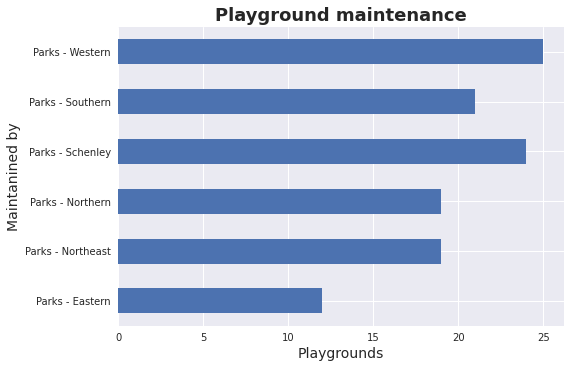

In [2]:
plt.style.use('seaborn')
playgrounds.groupby('maintenance_responsibility').count().plot.barh(legend=None,y='park')
plt.title("Playground maintenance",fontsize=18,fontweight='bold')
plt.xlabel("Playgrounds",fontsize=14)
plt.ylabel("Maintanined by",fontsize=14)

From the graph, Parks-Western and Parks-Schenley maintain the highest number of parks and Parks-Northern and Parks-Northeast maintain the same number of parks. It is fair to assume that the the one who maintains many parks has gathered experience over time and is equipped with all the resources to continue to do so.

When you look at the dataset you will notice that majority of parks have only one playground, in fact, more than a hundred parks have only a single playground, therefore, we will only be looking at parks with more than one playground.

We do this by creating a new dataset named parks that contains details of parks with more than one playground. This is done by using a simple filter function:

In [3]:
def filter_function(x,threshold):
    return x['name']>threshold

parks = playgrounds.groupby('park').count()
parks = parks.groupby(parks.index).filter(filter_function,threshold=1)

Using the newly created dataset parks we will plot a bar graph to see the number of playgrounds each park has:

Text(0, 0.5, 'Playgrounds count')

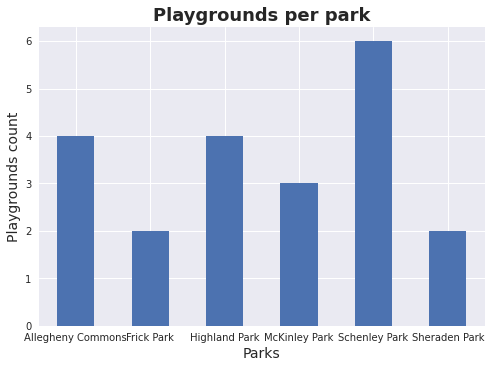

In [4]:
parks.plot.bar(legend=None,y='name',rot=0)  
plt.title("Playgrounds per park",fontsize=18,fontweight='bold')
plt.xlabel("Parks",fontsize=14)
plt.ylabel("Playgrounds count",fontsize=14)

We can observe that Schenley Park has the most number of playgrounds followed by Allegheny Commons and Highland park having equal number of playgrounds.

Let us look at who maintains these three parks. This is again achieved by using a simple filter fuction and storing one filtered row as new dataset named playground: 

In [5]:
def filter_function(x,threshold):
    return x['park']==threshold

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Schenley Park')
playground = playground.head(1)
print("Schenley Park is maintained by    :",(playground['maintenance_responsibility']).to_string(index=False))

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Allegheny Commons')
playground = playground.head(1)
print("Allegheny Commons is maintained by:",(playground['maintenance_responsibility']).to_string(index=False))

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Highland Park')
playground = playground.head(1)
print("Highland Park is maintained by    :",(playground['maintenance_responsibility']).to_string(index=False))

Schenley Park is maintained by    :  Parks - Schenley
Allegheny Commons is maintained by:  Parks - Northern
Highland Park is maintained by    :  Parks - Northeast


Schenley Park is maintained by Parks-Schenley which accoring to the first graph maintains one of the highest number of parks and Allegheny Commons and Highland Park are maintained by Parks-Northern and Parks-Northeast which are are on the same level from the first graph.

* **Therefore, the ranking of the top three parks in terms of playgrounds is :**  
1) Schenley Park  
2) Allegheny Commons / Highland Park

Now, we will to work with the courts dataset alone. The dataset contains many columns but like before we will be only focusing on the columns titled 'name' , 'type' , and 'park'

The following code gives the summary of statistics for number of courts a parks has:

In [6]:
stat = courts.groupby('park').count().describe()
stat.loc[:,'name']

count    98.000000
mean      2.479592
std       2.729108
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max      18.000000
Name: name, dtype: float64

It can observed that on average a park has 2 parks with a standard deviation of 3. We wish to consider the above average parks so will only focus on parks with more than 3 courts i.e. at least 4 courts.

This is again done by using a simple filter function and storing the filtered data in a new dataset named court:

In [7]:
def filter_function(x,threshold):
    return x['name']>threshold

court = courts.groupby('park').count()
court = court.groupby(court.index).filter(filter_function,threshold=3)

Plotting the data of the courts dataset i.e. graph representing number of courts per park: 

Text(0, 0.5, 'Parks')

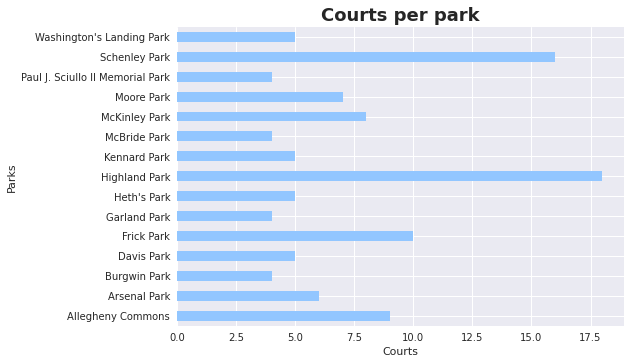

In [8]:
plt.style.use('seaborn-pastel')
court.plot.barh(legend=None,y='name')
plt.title("Courts per park",fontsize=18,fontweight='bold')
plt.xlabel("Courts")
plt.ylabel("Parks")

It can be observed that the top four parks in order are Highland Park, Schenley Park, Frick Park, and Allegheny Commons.

If we recall, Schenley Park was ranked first with respect to playgrounds and here it is likely to be ranked at top two with respect to courts and thus we might conclude that Schenley Park is the best. But this is a mistake. A park with most number of courts need not be the best, what if all the courts were just volleyball? You need options, differnt courts to choose, so it is important to look at the type of courts each park has.

The following code does just that. Looking at each of the top four parks and the unique courts it has and plotting a pie chart to represent:

In [9]:
def filter_function(x,threshold):
    return x['park']==threshold

h_park = courts.groupby(courts.index).filter(filter_function,threshold='Highland Park')
s_park = courts.groupby(courts.index).filter(filter_function,threshold='Schenley Park')
f_park = courts.groupby(courts.index).filter(filter_function,threshold='Frick Park')
a_park = courts.groupby(courts.index).filter(filter_function,threshold='Allegheny Commons')

Text(0, 0.5, '')

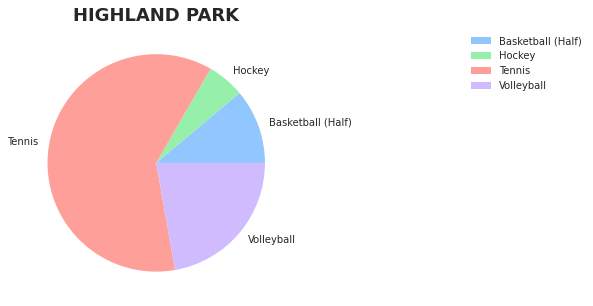

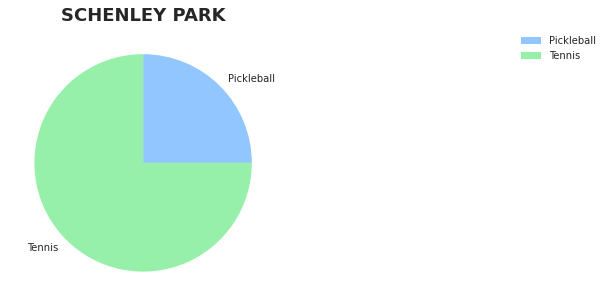

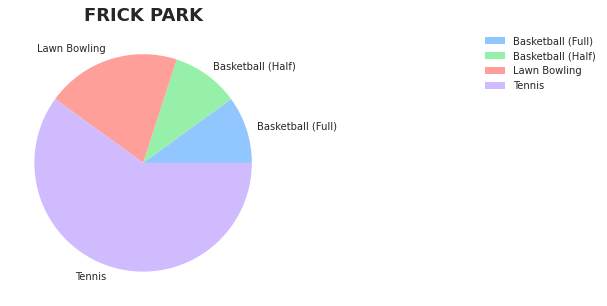

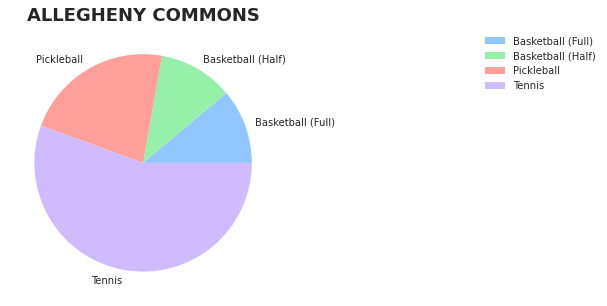

In [10]:
h_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("HIGHLAND PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.1,1))
plt.ylabel(None)

s_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("SCHENLEY PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

f_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("FRICK PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

a_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("ALLEGHENY COMMONS",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

We see that Schenley Park, with higher number of courts, does not offer much choice in comparison to the rest.

* **Therefore, the ranking of the top three parks in terms of courts is :**  
1) Highland Park   
2) Allegheny Commons / Frick Park  
3) Schenley Park

#### Looking at analysis thus far from both the datasets:
* Best Parks in terms of playgrounds:  
  1)Schenley Park  
  2)Allegheny Commons / Highland Park  
  
* Best Parks in terms of courts:  
  1)Highland Park  
  2)Allegheny Commons / Frick Park  
  3)Schenly Park

#### **Therefore, the `final ranking of best parks` is:**
1) Highland Park  
2) Allegheny Commons / Schenly Park

## Finding closest neighborhoods to best parks in Pittsburgh

In [11]:
import pandas as pd
df = pd.read_csv("Neighborhoods.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)

hoods = df['hood'].unique()

for x in hoods:
    print(x)
    
i = 0
while i < hoods.size:
    hoods[i]+=', Pittsburgh'
    i = i+1

Chateau
Summer Hill
Northview Heights
Spring Hill-City View
Perry South
Fineview
Central Northside
Spring Garden
Troy Hill
East Allegheny
Manchester
Allegheny West
North Shore
Allegheny Center
Brighton Heights
Marshall-Shadeland
California-Kirkbride
Perry North
Hays
Lincoln Place
New Homestead
Homewood South
Lincoln-Lemington-Belmar
East Hills
Bloomfield
Highland Park
Garfield
Morningside
Larimer
Friendship
Regent Square
Shadyside
Point Breeze North
Homewood North
Homewood West
East Liberty
Central Oakland
North Oakland
West Oakland
Crawford-Roberts
Strip District
Central Business District
Central Lawrenceville
Middle Hill
Squirrel Hill North
Terrace Village
Bluff
Hazelwood
South Oakland
Greenfield
Squirrel Hill South
Stanton Heights
Lower Lawrenceville
Point Breeze
Swisshelm Park
Upper Lawrenceville
Polish Hill
Bedford Dwellings
Upper Hill
Glen Hazel
Beltzhoover
South Side Flats
Allentown
South Side Slopes
Mount Washington
Duquesne Heights
Bon Air
Arlington
St. Clair
Mt. Oliver
Knoxvi

In [12]:
for x in hoods:
    print(x)


import geocoder

newArray = [[]]

x=0
while x < hoods.size:
    f = geocoder.locationiq(hoods[x],key='pk.67bc66f39bef2fde56fe6de2d7f435c9')
    print(f.address)
    newArray.append([f.lat, f.lng])
    x=x+1
    time.sleep(1)
    


Chateau, Pittsburgh
Summer Hill, Pittsburgh
Northview Heights, Pittsburgh
Spring Hill-City View, Pittsburgh
Perry South, Pittsburgh
Fineview, Pittsburgh
Central Northside, Pittsburgh
Spring Garden, Pittsburgh
Troy Hill, Pittsburgh
East Allegheny, Pittsburgh
Manchester, Pittsburgh
Allegheny West, Pittsburgh
North Shore, Pittsburgh
Allegheny Center, Pittsburgh
Brighton Heights, Pittsburgh
Marshall-Shadeland, Pittsburgh
California-Kirkbride, Pittsburgh
Perry North, Pittsburgh
Hays, Pittsburgh
Lincoln Place, Pittsburgh
New Homestead, Pittsburgh
Homewood South, Pittsburgh
Lincoln-Lemington-Belmar, Pittsburgh
East Hills, Pittsburgh
Bloomfield, Pittsburgh
Highland Park, Pittsburgh
Garfield, Pittsburgh
Morningside, Pittsburgh
Larimer, Pittsburgh
Friendship, Pittsburgh
Regent Square, Pittsburgh
Shadyside, Pittsburgh
Point Breeze North, Pittsburgh
Homewood North, Pittsburgh
Homewood West, Pittsburgh
East Liberty, Pittsburgh
Central Oakland, Pittsburgh
North Oakland, Pittsburgh
West Oakland, Pitt

ModuleNotFoundError: No module named 'geocoder'

In [ ]:
print(newArray)
newArray.pop(0)
from scipy.spatial import Voronoi, voronoi_plot_2d, cKDTree
vor = Voronoi(newArray)


In [ ]:
import matplotlib.pyplot as plt
voronoi_plot_2d(vor, show_vertices=False)
fig = voronoi_plot_2d(vor)
f = geocoder.locationiq('Highland Park, Pittsburgh',key='pk.67bc66f39bef2fde56fe6de2d7f435c9')
new_point = [f.lat, f.lng]
plt.plot(new_point[0], new_point[1], 'ro')
f = geocoder.locationiq('Allegheny Commons, Pittsburgh',key='pk.67bc66f39bef2fde56fe6de2d7f435c9')
new_point1 = [f.lat, f.lng]
plt.plot(new_point1[0], new_point1[1], 'ro')
plt.show()



In [ ]:
voronoi_kdtree= cKDTree(newArray)
test_point_dist, test_point_regions = voronoi_kdtree.query(new_point)
print(test_point_regions)
#this code right here finds the region in which highland park is contained
#region 23 is corresponded to Lincoln-Leminghon-Belmar

In [ ]:
test_point_dist, test_point_regions = voronoi_kdtree.query(new_point1)
print(test_point_regions)
#this code right here finds the region in which allegheny commons is contained
#region 11 is corresponded to manchester

Based on the longitude and latitudes corresponding to the voronoi diagram regions and coordinates, the neighborhoods that are closest in distance objectively to Highland Park, is the Lincoln-Leminhhon-Belmar which is voronoi region number 23. The neighboor closest to allegheny commons is Manchester which is region numbrer 11. Based on my metric for this data set, these two neighborhoods are the closet objectively to regions in which there is a top rated park. I used  the park from my other group members data sets which gave the best outcome to come up with this conclusion as to which to use. A voronoi diagram gives a graph in which any point contained with in a region is the optimal and closest point, graphing the two parks on this diagram I was able to conclude the two neighborhoods which best fit this metric. 

### Closest Neighboorhoods
   1. Lincoln-Leminghon-Belmar
   2. Manchester

### Deciding by Public Transit ###
Previous work has shown that the neighborhoods closest to the best parks are Manchester and Lincoln-Lemington-Belmar. Next, let's look and see which of those neighborhoods has the better accessibility to parks by seeing which has the better public transport options. We will be taking a look at how consistently on-time the Port Authority routes that go through these neighborhoods are.

Routes in Manchester:
* 18
* 17
* 14
* 19L

Routes in Lincoln-Lemington-Belmar:
* P10
* 74

In [13]:
routes_data = pd.read_csv("Routes.csv")

First, let's separate the data into two dataframes: one containing data for the routes going through Manchester, and one the routes going through Lincoln-Lemington-Belmar.

In [14]:
mc = routes_data[(routes_data.route.isin(["18","17","14", "19L"]))]
llb = routes_data[(routes_data.route.isin(["P10", "74"]))]

This dataset has a lot of extraneous information that's not very important to us and is hard to graph, so let's pivot the tables such that we can index each route's on-time percentage by the date.

In [15]:
mc = pd.pivot_table(mc, index='month_start', columns='route', values='on_time_percent')
llb = pd.pivot_table(llb, index='month_start', columns='route', values='on_time_percent')

Now we can compare the two neighborhoods with some line and box-and-whisker graphs. We chose these graphs because they tell us two valuable things. First, the box-and-whisker plots will show us how on-time each route tends to be in general; we want routes that don't just have a few very good datapoints, but consistently good ones. Next, the line graphs will help us see if there are any recent trends that the box-and-whisker plots may have missed - for example, a line may have suddenly started improving a great deal, which the box-and-whisker plot may have caught as an outlier, but in fact could be a promising trend.

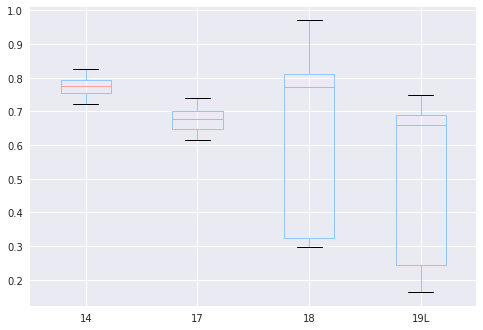

In [16]:
mc.boxplot()

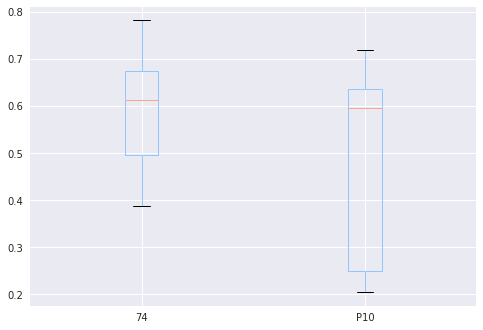

In [17]:
llb.boxplot()

A challenge going into this was to see how we might take into account the fact that Manchester has twice as many options for routes as Lincol-Lemington-Belmar. However, even just after seeing this initial data, we can tell that Manchester's two best routes (14 and 17) are significantly better than either of Lincoln-Lemington-Belmar's. Still, let's take a look at the trends over time to make sure we are not overly influenced by history.

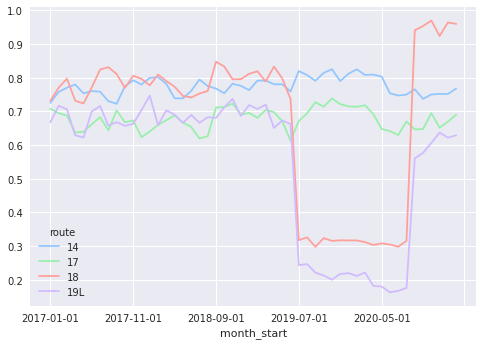

In [18]:
mc.plot()

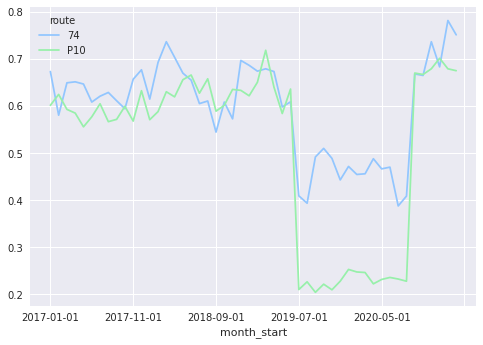

In [19]:
llb.plot()

Though route 74 is worth watching in the future to see if its on-time percentage continues to improve, we can see that even in recent history routes 14 and 17 significantly outperform it, and also have a better record for consistency by far. Thus we can conclude that the best neighborhood in Pittsburgh is Manchester.
### Best Neighborhood: Manchester ###

**Conclusion(Suchi Attota):** Socializing is an important part of our life and it is also important to spend time with our friends and family and enjoy. Our metric used this concept to come with the best neighborhood and what I love the most about this project and what makes it unique is that the sub-metrics are not standalone metrics, that is, each sub-metric did not come up with a conclusion about the best neighborhood but a result for the next metric to use. The metrics follow a logical flow consistent with the main metric. I particularly worked with the first metric that came up with the best parks. Working with two datasets was time-consuming and had a lot of trial & error decisions but it was worth the effort and I completely agree with the result I came up with. Coming to the final result, there is no reason I can not agree with it. The metrics fully analyzed all possibilities and have given concrete proof to say Manchester is the best neighborhood.